Student Name: Tsai, Yu-Yun

USCID:1022494450

Github:yuyuntsai

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
col_names = ['time','avg_RSS12', 'var_RSS12', 'avg_RSS13', 'var_RSS13', 'avg_RSS23', 'var_RSS23']

In [3]:
loc = os.getcwd()
all_files = glob.glob(os.path.join(loc,'../data/AReM', "**/*.csv"))

data_dict={}

for files in all_files:
    
        df = pd.read_csv(files, skiprows=5, names = col_names)
        data_dict[files] = df
        
        #print(files)
    
#data_dict    

2. Time Series Classification Part 2: Binary and Multiclass Classification (a) Binary Classification Using Logistic Regression3

i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).


In [4]:
loc = os.getcwd()
all_files = glob.glob(os.path.join(loc,'../data/AReM', "**/*.csv"))

train_dict={}
test_dict={}

for filename in all_files:
        
        if filename.endswith("dataset1.csv") or filename.endswith("dataset2.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        elif  filename.endswith("walking/dataset3.csv") or filename.endswith("cycling/dataset3.csv") or filename.endswith("sitting/dataset3.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        elif  filename.endswith("lying/dataset3.csv") or filename.endswith("standing/dataset3.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        else:
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            train_dict[filename] = df
    

    #print(files)
    
#train_dict    

In [5]:
ai_features=['Min','Max','Mean']
series = [1,2,6]
#create a dictionary
col={}

#create lists for features
#for k in range(1,7,1):
for k in series:   
        for feat in ai_features:
            col[feat+str(k)]=[]
            col[feat+str(k)]=[]
            col[feat+str(k)]=[]
        
#calculate features
for files in train_dict  :
     
          for k in series:
                    col['Min'+str(k)].append((np.min(train_dict[files].iloc[:,k])))
                    col['Max'+str(k)].append((np.max(train_dict[files].iloc[:,k])))
                    col['Mean'+str(k)].append((np.mean(train_dict[files].iloc[:,k])))
                    
#print(col)

In [6]:
#binary classification 
classes=[]

for files in train_dict:
    if 'bending' in files:
        binary_class= 1
        classes.append(binary_class)
    else:
        binary_class= 0
        classes.append(binary_class)

#convert to a dataframe with classes
dfai_feat = pd.DataFrame(col)
dfai_feat = dfai_feat.assign(classes = classes)
dfai_feat

,Min1,Max1,Mean1,Min2,Max2,Mean2,Min6,Max6,Mean6,classes
0,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,1
1,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,1
2,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,1
3,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,1
4,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,1
...,...,...,...,...,...,...,...,...,...,...
64,18.50,44.25,35.752354,0.0,12.60,3.328104,0.0,9.39,3.069667,0
65,24.25,45.00,37.177042,0.0,8.58,2.374208,0.0,9.34,2.921729,0
66,23.33,43.50,36.244083,0.0,9.71,2.736021,0.0,11.15,3.530500,0
67,26.25,44.25,36.957458,0.0,8.64,2.420083,0.0,8.34,2.934625,0


/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


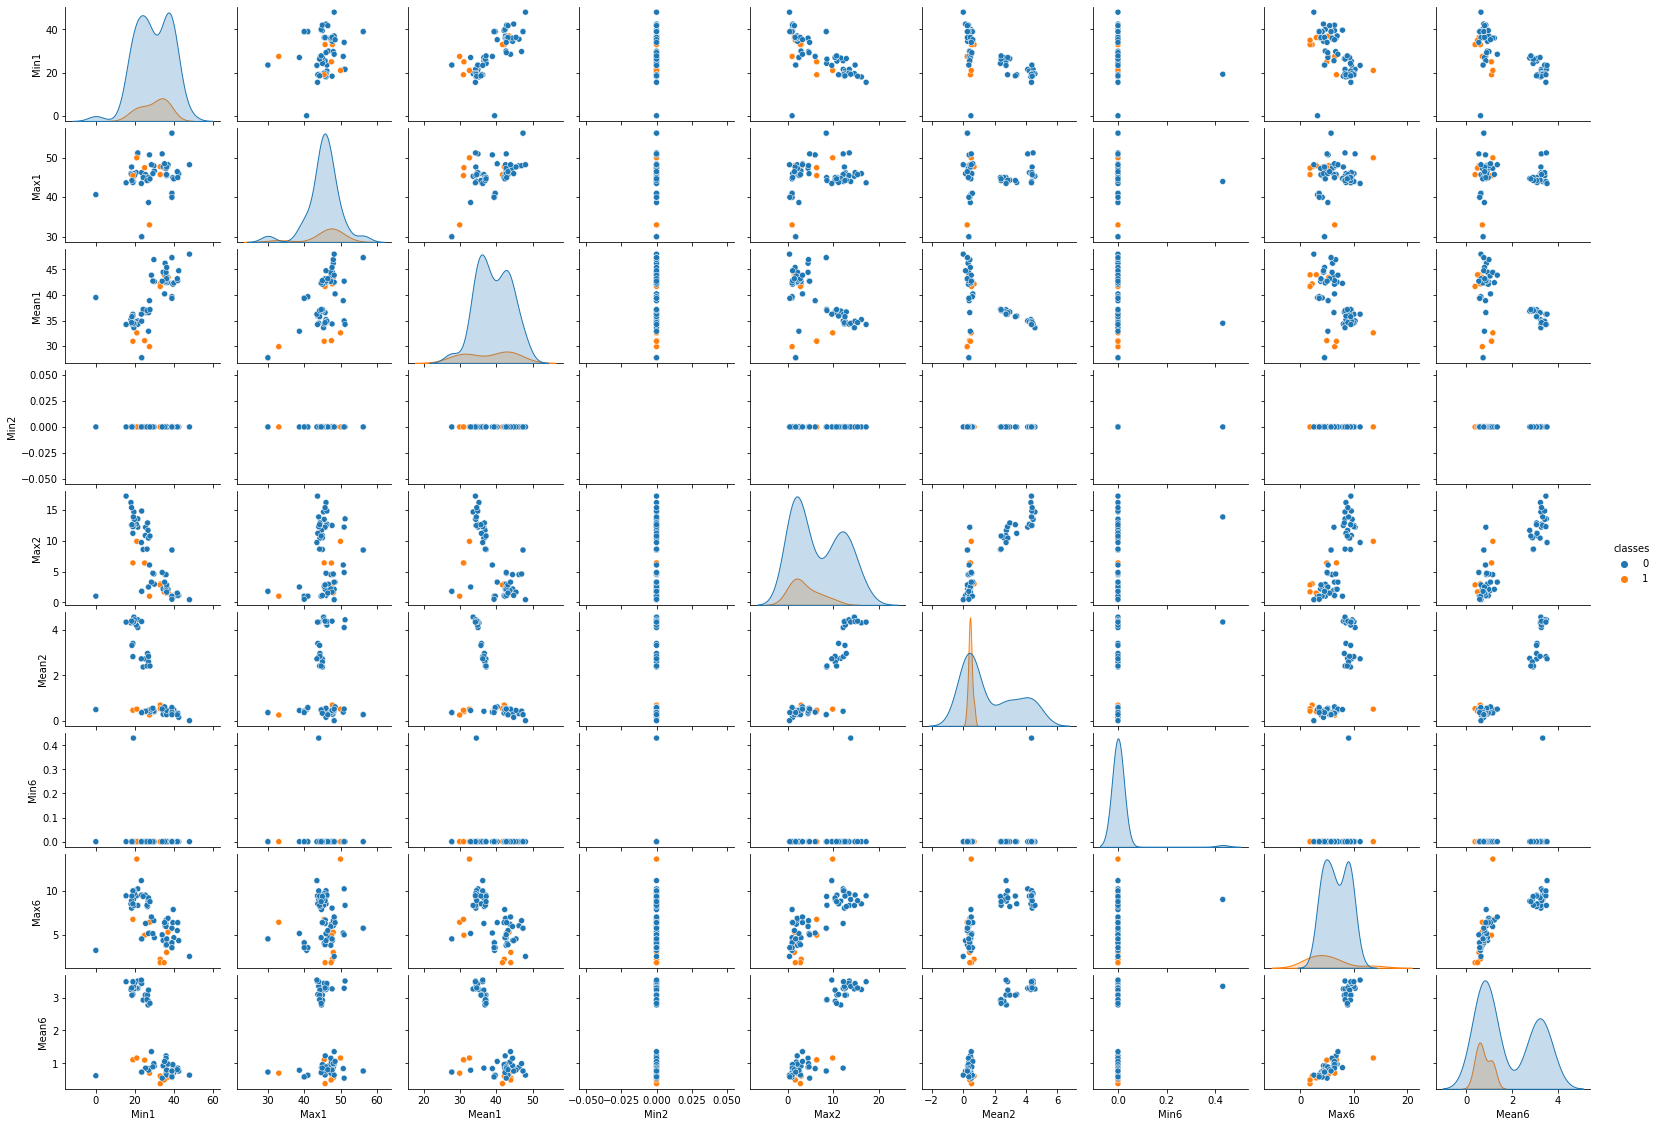

In [7]:
#scatterplots
sns.pairplot(dfai_feat,hue='classes')
plt.subplots_adjust(top=0.7)
plt.show()

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [8]:
loc = os.getcwd()
all_files = glob.glob(os.path.join(loc,'../data/AReM', "**/*.csv"))

test_dict={}
train_1={}
train_2={}

for filename in all_files:
        
        if filename.endswith("dataset1.csv") or filename.endswith("dataset2.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        elif  filename.endswith("walking/dataset3.csv") or filename.endswith("cycling/dataset3.csv") or filename.endswith("sitting/dataset3.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        elif  filename.endswith("lying/dataset3.csv") or filename.endswith("standing/dataset3.csv"):   
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            test_dict[filename] = df
        else:
            df = pd.read_csv(filename, skiprows=5, names = col_names)
            
            train_1[filename] = df.iloc[:240,:]
            train_2[filename] = df.iloc[240:480,:]
            
train_1

{'/Users/yuyun/Documents/USC class/Spring 2022/DSCI552/hw4/notebook/../data/AReM/bending1/dataset7.csv':       time  avg_RSS12  var_RSS12  avg_RSS13  var_RSS13  avg_RSS23  var_RSS23
 0        0      42.00       0.00      18.50       0.50      12.00       0.00
 1      250      42.00       0.00      18.00       0.00      11.33       0.94
 2      500      42.75       0.43      16.75       1.79      18.25       0.43
 3      750      42.50       0.50      16.75       0.83      19.00       1.22
 4     1000      43.00       0.82      16.25       0.83      18.00       0.00
 ..     ...        ...        ...        ...        ...        ...        ...
 235  58750      42.00       0.00      17.75       1.09      16.50       0.50
 236  59000      38.75       1.09      14.25       0.83      16.25       1.09
 237  59250      36.67       0.94      13.67       0.47      18.50       0.87
 238  59500      39.25       0.43      16.00       0.71      16.75       0.83
 239  59750      43.25       1.30     

In [9]:
list_train_1 = list(train_1.values())
list_train_2 = list(train_2.values())
df1_train = pd.DataFrame(np.concatenate(list_train_1),columns = col_names)
df2_train = pd.DataFrame(np.concatenate(list_train_2),columns = col_names)

In [10]:
all_dict = {**train_1,**train_2}
all_dict

{'/Users/yuyun/Documents/USC class/Spring 2022/DSCI552/hw4/notebook/../data/AReM/bending1/dataset7.csv':        time  avg_RSS12  var_RSS12  avg_RSS13  var_RSS13  avg_RSS23  var_RSS23
 240   60000      46.25       0.83      22.50       0.87      19.25       1.92
 241   60250      46.75       0.43      22.25       0.83      19.25       1.09
 242   60500      47.00       0.00      24.00       0.00      22.25       1.09
 243   60750      47.50       0.50      22.50       1.12      23.75       0.43
 244   61000      47.50       0.50      20.75       1.09      22.00       1.22
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      44.25       0.83      16.25       1.30      24.00       0.00
 476  119000      44.00       0.71      11.00       1.00      24.00       0.00
 477  119250      44.25       0.43      10.25       1.30      22.75       0.83
 478  119500      43.75       0.43       7.33       2.87      21.50       0.50
 479  119750      44.50    

In [11]:
df_all = pd.concat([df1_train, df2_train],axis=1)
df_all

,time,avg_RSS12,var_RSS12,avg_RSS13,var_RSS13,avg_RSS23,var_RSS23,time,avg_RSS12,var_RSS12,avg_RSS13,var_RSS13,avg_RSS23,var_RSS23
0,0.0,42.00,0.00,18.50,0.50,12.00,0.00,60000.0,46.25,0.83,22.50,0.87,19.25,1.92
1,250.0,42.00,0.00,18.00,0.00,11.33,0.94,60250.0,46.75,0.43,22.25,0.83,19.25,1.09
2,500.0,42.75,0.43,16.75,1.79,18.25,0.43,60500.0,47.00,0.00,24.00,0.00,22.25,1.09
3,750.0,42.50,0.50,16.75,0.83,19.00,1.22,60750.0,47.50,0.50,22.50,1.12,23.75,0.43
4,1000.0,43.00,0.82,16.25,0.83,18.00,0.00,61000.0,47.50,0.50,20.75,1.09,22.00,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,58750.0,38.50,2.60,13.67,1.89,18.75,1.79,119000.0,36.33,0.47,16.00,3.16,20.33,1.70
16556,59000.0,33.00,2.12,10.25,5.72,20.25,1.30,119250.0,31.50,1.50,21.00,0.00,12.25,7.12
16557,59250.0,35.33,5.91,17.75,3.11,13.67,1.25,119500.0,34.25,6.38,12.67,2.49,15.25,4.21
16558,59500.0,36.25,3.90,13.00,3.94,17.50,0.50,119750.0,38.33,0.94,15.25,2.17,20.33,1.25


In [12]:
aii_features=['Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave points']
series1 = [1,2,6]
#create a dictionary
col_aii={}

#create lists for features

for k in series1:   
        for feat in aii_features:
            col_aii[feat+str(k)]=[]
            col_aii[feat+str(k)]=[]
            col_aii[feat+str(k)]=[]
        
#calculate features of train_1
for files in train_1:
      
          for k in series1:
                    col_aii['Min'+str(k)].append((np.min(train_1[files].iloc[:,k])))
                    col_aii['Max'+str(k)].append((np.max(train_1[files].iloc[:,k])))
                    col_aii['Mean'+str(k)].append((np.mean(train_1[files].iloc[:,k])))
                    
#print(col_aii)
dfaii_feat = pd.DataFrame(col_aii)
#dfaii_feat

In [13]:
aii_features=['Min','Max','Mean']
#create a dictionary
col_aii2={}

#create lists for features

for k in series1:   
        for feat in aii_features:
            col_aii2[feat+str(k)]=[]
            col_aii2[feat+str(k)]=[]
            col_aii2[feat+str(k)]=[]
        
#calculate features of train_2
for files in train_2:

          for k in series1:
                    col_aii2['Min'+str(k)].append((np.min(train_2[files].iloc[:,k])))
                    col_aii2['Max'+str(k)].append((np.max(train_2[files].iloc[:,k])))
                    col_aii2['Mean'+str(k)].append((np.mean(train_2[files].iloc[:,k])))
                    
#print(col_aii)
dfaii2_feat = pd.DataFrame(col_aii2)
dfaii2_feat.columns = (['Min7','Max7','Mean7','Min8','Max8','Mean8','Min12','Max12','Mean12'])
#dfaii2_feat

In [14]:
aii_all = pd.concat([dfaii_feat,dfaii2_feat],axis=1)
classes2=[]

for files in all_dict:
    if 'bending' in files:
        binary_class= 1
        classes2.append(binary_class)
    else:
        binary_class= 0
        classes2.append(binary_class)
len(classes2)  
aii_all = aii_all.assign(classes=classes2)
aii_all

,Min1,Max1,Mean1,Min2,Max2,Mean2,Min6,Max6,Mean6,Min7,Max7,Mean7,Min8,Max8,Mean8,Min12,Max12,Mean12,classes
0,36.67,45.00,43.486208,0.0,1.30,0.378667,0.0,2.28,0.524875,36.25,48.00,44.452042,0.0,1.50,0.447583,0.0,2.96,0.585750,1
1,39.00,48.00,44.117042,0.0,1.30,0.250042,0.0,5.26,0.815417,37.00,46.50,42.792875,0.0,1.58,0.506125,0.0,4.06,0.543875,1
2,33.75,47.75,43.278875,0.0,3.00,0.673292,0.0,1.53,0.640958,33.00,46.00,41.080750,0.0,2.86,0.718792,0.0,2.18,0.586083,1
3,33.00,45.75,41.621208,0.0,2.83,0.623083,0.0,1.79,0.419083,39.25,43.67,41.734917,0.0,1.12,0.448875,0.0,1.50,0.347500,1
4,36.50,46.50,44.057167,0.0,1.50,0.381042,0.0,1.79,0.598250,35.00,47.40,43.851833,0.0,1.70,0.471458,0.0,1.50,0.388333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,20.00,44.25,35.692167,0.0,11.39,3.324208,0.0,9.39,3.172417,18.50,44.00,35.812542,0.0,12.60,3.332000,0.0,8.81,2.966917,0
65,24.25,45.00,36.954208,0.0,8.18,2.392667,0.0,9.07,3.005375,29.00,44.67,37.399875,0.0,8.58,2.355750,0.0,9.34,2.838083,0
66,27.00,42.67,36.342750,0.0,9.71,2.691917,0.0,9.57,3.547750,23.33,43.50,36.145417,0.0,9.63,2.780125,0.0,11.15,3.513250,0
67,26.25,43.40,36.865417,0.0,7.46,2.387250,0.0,8.26,2.964792,29.25,44.25,37.049500,0.0,8.64,2.452917,0.0,8.34,2.904458,0


/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


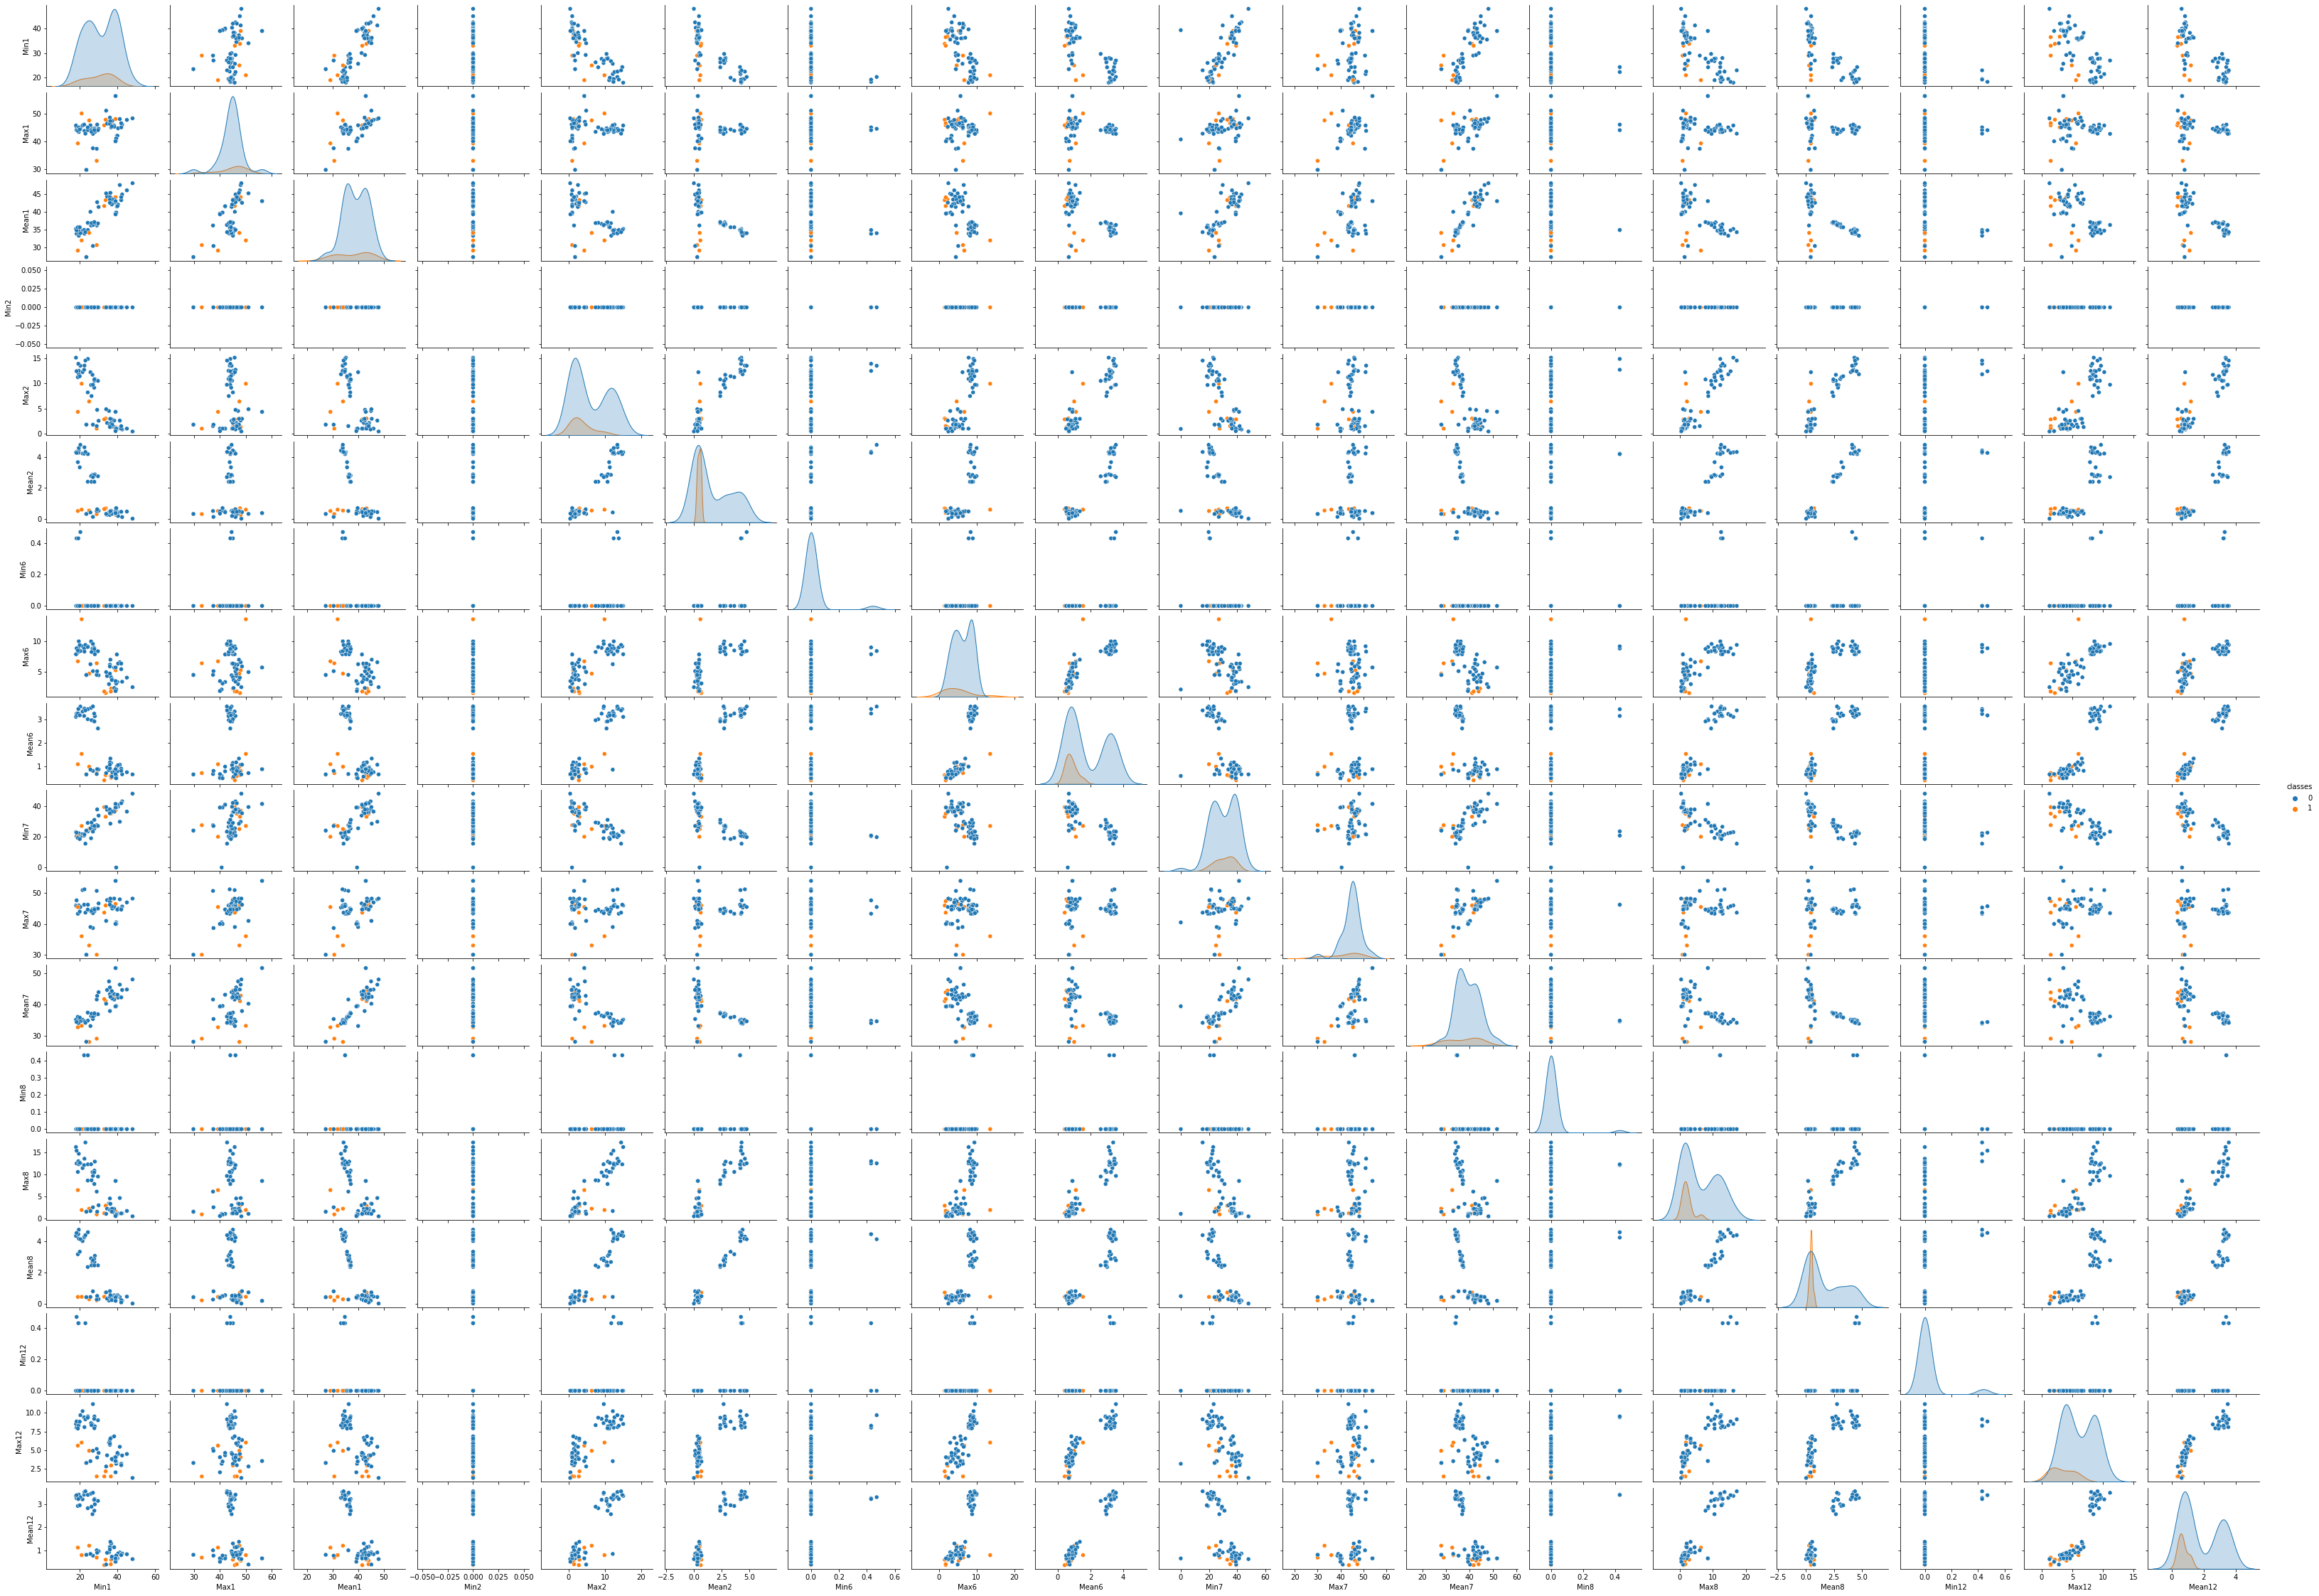

In [15]:
#scatterplots
aii_all = aii_all.assign(classes = classes2)
sns.pairplot(aii_all,hue='classes')
plt.subplots_adjust(top=0.7)
plt.show()

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.


In [16]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# load the iris datasets 
#dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes 
#model = LogisticRegression()
# create the RFE model and select 3 attributes 
#rfe =RFE(model,3)
#rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes 
#print(rfe.support)
#print(rfe.ranking)

In [17]:
#filename
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']

In [18]:
testset = []
trainset = []

#split the data to train and test set 
for filename in data_dict:
    
    for i in activity:
        if i in filename:
            data_dict[(filename)]['activity']=i
    
    if 'bending' in filename:
        if filename.endswith("dataset1.csv") or filename.endswith("dataset2.csv"): 
            #add classes to seperate bending files and not bending files
            data_dict[(filename)]['classes']='bending'
            testset.append(data_dict[(filename)])
        elif  filename.endswith("walking/dataset3.csv") or filename.endswith("cycling/dataset3.csv") or filename.endswith("sitting/dataset3.csv"):   
            data_dict[(filename)]['classes']='bending'
            testset.append(data_dict[(filename)]) 
        elif  filename.endswith("lying/dataset3.csv") or filename.endswith("standing/dataset3.csv"):   
            data_dict[(filename)]['classes']='bending'
            testset.append(data_dict[(filename)])
        else:
            data_dict[(filename)]['classes']='bending'
            trainset.append(data_dict[(filename)])
            
    else :
        if filename.endswith("dataset1.csv") or filename.endswith("dataset2.csv"):   
            data_dict[(filename)]['classes']='other'
            testset.append(data_dict[(filename)])
        elif  filename.endswith("walking/dataset3.csv") or filename.endswith("cycling/dataset3.csv") or filename.endswith("sitting/dataset3.csv"):   
            data_dict[(filename)]['classes']='other'
            testset.append(data_dict[(filename)]) 
        elif  filename.endswith("lying/dataset3.csv") or filename.endswith("standing/dataset3.csv"):   
            data_dict[(filename)]['classes']='other'
            testset.append(data_dict[(filename)])
        else:
            data_dict[(filename)]['classes']='other'
            trainset.append(data_dict[(filename)])
            
        
#len(trainset)

In [19]:
def time_series(l):
    new_df = pd.DataFrame()
    split_train={}
    
    for l in range(l,l+1):
        for data in range(len(trainset)):
            classes = trainset[data]['classes']
            split_train = np.array_split(trainset[data],l)
            
            split_df = pd.DataFrame()
            for l1 in split_train:
                split_df = pd.concat([split_df.reset_index(drop=True),l1.reset_index(drop=True).\
                                      drop(columns=['time','classes','activity'])],axis=1)
            
            split_agg = np.array_split(split_df.agg(['min','max','mean']),3)
            split_agg[0].columns = split_agg[0].columns+'_min'
            split_agg[1].columns = split_agg[1].columns+'_max'
            split_agg[2].columns = split_agg[2].columns+'_mean'
            
            temp = pd.DataFrame()

            for l1 in split_agg:
                temp = pd.concat([temp.reset_index(drop=True),l1.reset_index(drop=True)],axis=1)
                

            temp['classes'] = classes
            new_df = pd.concat([new_df, temp])
    
    l = []
    m = []

    for i in range(1, int((len(new_df.columns)-1)/18)+1):
        l.append(list(new_df.iloc[:,(i-1)*18:i*18].columns+'_'+str(i)))
        m += l[i-1]

    m = m+['classes']
    new_df.columns = m

    
    return new_df

In [20]:
#l ∈ {1, 2, . . . , 20} time series for trainset
dfa_1 = time_series(1)
dfa_2 = time_series(2)
dfa_3 = time_series(3)
dfa_4 = time_series(4)
dfa_5 = time_series(5)
dfa_6 = time_series(6)
dfa_7 = time_series(7)
dfa_8 = time_series(8)
dfa_9 = time_series(9)
dfa_10 = time_series(10)
dfa_11 = time_series(11)
dfa_12 = time_series(12)
dfa_13 = time_series(13)
dfa_14 = time_series(14)
dfa_15 = time_series(15)
dfa_16 = time_series(16)
dfa_17 = time_series(17)
dfa_18 = time_series(18)
dfa_19 = time_series(19)
dfa_20 = time_series(20)

#create a list to save 
series_list=[dfa_1, dfa_2, dfa_3, dfa_4, dfa_5, dfa_6, dfa_7, dfa_8, dfa_9, dfa_10, 
               dfa_11, dfa_12, dfa_13, dfa_14, dfa_15, dfa_16, dfa_17, dfa_18, dfa_19, dfa_20]

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [22]:
feat2={}
score=[]
n_feat=[]
for c,s in enumerate(series_list):
    y = s['classes']
    X = s.drop(columns='classes')
    process =  preprocessing.LabelEncoder()
    process.fit(y)
    y=process.transform(y)
    m1 = LogisticRegression(max_iter = 10000, C= float('inf'))
    rf = RFECV(estimator=m1,cv=StratifiedKFold(shuffle=True, random_state=24),scoring='accuracy')
    rf = rf.fit(X,y)
    #score.append(rf.cv_results_)
    score.append(rf.grid_scores_.mean())
    #number of features
    n_feat.append(rf.n_features_)
    feat = []
    
    #list feature names
    for m, v in enumerate(X.columns):
        ft = rf.support_
        if ft[m] == True:
             feat.append(v) 
    feat2[str(c+1)] = feat

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and w

In [23]:
#create a dataframe to save
df_feat_aiii = pd.DataFrame()
df_feat_aiii = df_feat_aiii.assign(L = feat2,num_features = n_feat, feature_name = feat2.values(), scores=score)
df_feat_aiii

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,L,num_features,feature_name,scores
1,1,6,"[avg_RSS23_min_1, var_RSS12_max_1, avg_RSS23_m...",0.985531
2,2,5,"[avg_RSS23_min_1, var_RSS12_max_1, avg_RSS23_m...",0.957845
3,3,4,"[avg_RSS23_min_1, var_RSS12_max_2, avg_RSS23_m...",0.951852
4,4,2,"[avg_RSS23_max_2, avg_RSS12_max_2]",0.940018
5,5,2,"[avg_RSS23_mean_4, avg_RSS12_mean_5]",0.943419
6,6,16,"[avg_RSS13_min_1, avg_RSS23_min_1, avg_RSS23_m...",0.940904
7,7,49,"[avg_RSS12_min_1, avg_RSS13_min_1, avg_RSS23_m...",0.942866
8,8,111,"[avg_RSS12_min_1, avg_RSS13_min_1, avg_RSS23_m...",0.932746
9,9,114,"[avg_RSS12_min_1, avg_RSS13_min_1, avg_RSS23_m...",0.926340
10,10,98,"[avg_RSS12_min_1, avg_RSS13_min_1, avg_RSS23_m...",0.934255


Wrong way apply cross-validation in step two(apply a classifier), right way apply cross-validation in both step(1. find the predictors and 2. apply a classifier). We use right way for this question, so we do the RFECV before we fit the model.

iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [24]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [25]:
y = dfa_1['classes']
X = dfa_1.drop(columns='classes')
#convert classes to binary
process =  preprocessing.LabelEncoder()
process.fit(y)
y = process.transform(y)
#fit logistic model
ma5 = LogisticRegression(max_iter = 10000, C= float('inf'))
rf_a5 = RFECV(estimator=ma5,cv=StratifiedKFold(shuffle=True, random_state=24),scoring='accuracy')
rf_a5 = rf_a5.fit(X,y)
#predict
y_pred = rf_a5.predict(X)

#build confusion matrix
confusion_matrix(y, y_pred)


array([[ 9,  0],
       [ 0, 60]])

In [26]:
#probabilities for the target (0 and 1 case) 
y_pred_prob = rf_a5.predict_proba(X)[::,1]
#roc
fpr, tpr, _ = roc_curve(y, y_pred_prob)

In [27]:
#calculate AUC
auc_score = roc_auc_score(y, y_pred_prob)

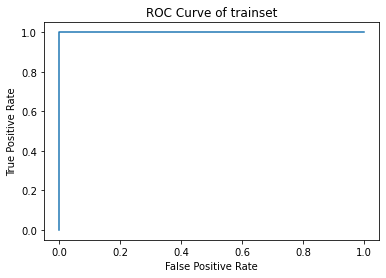

In [28]:
#plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of trainset')
plt.show()

In [29]:
#p-values
processa1 = preprocessing.LabelEncoder()
processa1.fit(dfa_1['classes'])
dfa_1['classes']=processa1.transform(dfa_1['classes'])
reg_smf = smf.logit('classes~avg_RSS23_min_1+var_RSS12_max_1+avg_RSS23_max_1+avg_RSS12_mean_1+avg_RSS13_mean_1+avg_RSS23_mean_1', data=dfa_1).fit(method='BFGS')
reg_smf.summary()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                classes   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                   1.000
Time:                        18:38:24   Log-Likelihood:            -1.6050e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.588e-10
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1539   8.78e+05   1.31e-06      1.000   -1.72e+06    1.72e+06
avg_RSS23_min_1     -6.0928   3.39e+04     -0.000      1.000   -6.65e+04    6.65e+04
var_RSS12_max_1      2.9930   9046.993      0.000      1.000   -1.77e+04    1.77e+04
avg_RSS23_max_1     -4.2158   1.53e+04     -0.000      1.000      -3e+04    2.99e+04
avg_RSS12_mean_1     4.4393   4.15e+04      0.000      1.000   -8.14e+04    8.14e+04
avg_RSS13_mean_1     2.0444   1.97e+04      0.000      1.000   -3.85e+04    3.85e+04
avg_RSS23_mean_1    -3.0902   3.04e+04     -0.000      1.000   -5.97e+04    5.97e+04
====================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [30]:
def time_series(l):
    new_df_test = pd.DataFrame()
    split_test={}
    
    for l in range(l,l+1):
        for data in range(len(testset)):
            classes = testset[data]['classes']
            split_test = np.array_split(testset[data],l)
            
            split_df_test = pd.DataFrame()
            for l2 in split_test:
                split_df_test = pd.concat([split_df_test.reset_index(drop=True),l2.reset_index(drop=True).\
                                      drop(columns=['time','classes','activity'])],axis=1)
            
            split_agg_test = np.array_split(split_df_test.agg(['min','max','mean']),3)
            split_agg_test[0].columns = split_agg_test[0].columns+'_min'
            split_agg_test[1].columns = split_agg_test[1].columns+'_max'
            split_agg_test[2].columns = split_agg_test[2].columns+'_mean'
            
            temp_test = pd.DataFrame()

            for l3 in split_agg_test:
                temp_test = pd.concat([temp_test.reset_index(drop=True),l3.reset_index(drop=True)],axis=1)
                

            temp_test['classes'] = classes
            new_df_test = pd.concat([new_df_test, temp_test])
    
    l = []
    m = []

    for i in range(1, int((len(new_df_test.columns)-1)/18)+1):
        l.append(list(new_df_test.iloc[:,(i-1)*18:i*18].columns+'_'+str(i)))
        m += l[i-1]

    m = m+['classes']
    new_df_test.columns = m
    
    
    return new_df_test

In [31]:
dfa2_1 = time_series(1)
dfa2_2 = time_series(2)
dfa2_3 = time_series(3)
dfa2_4 = time_series(4)
dfa2_5 = time_series(5)
dfa2_6 = time_series(6)
dfa2_7 = time_series(7)
dfa2_8 = time_series(8)
dfa2_9 = time_series(9)
dfa2_10 = time_series(10)
dfa2_11 = time_series(11)
dfa2_12 = time_series(12)
dfa2_13 = time_series(13)
dfa2_14 = time_series(14)
dfa2_15 = time_series(15)
dfa2_16 = time_series(16)
dfa2_17 = time_series(17)
dfa2_18 = time_series(18)
dfa2_19 = time_series(19)
dfa2_20 = time_series(20)


series_list_test=[dfa2_1, dfa2_2, dfa2_3, dfa2_4, dfa2_5, dfa2_6, dfa2_7, dfa2_8, dfa2_9, dfa2_10, 
               dfa2_11, dfa2_12, dfa2_13, dfa2_14, dfa2_15, dfa2_16, dfa2_17, dfa2_18, dfa2_19, dfa2_20]

In [32]:
y_test = dfa2_1['classes']
X_test = dfa2_1.drop(columns='classes')
process_t =  preprocessing.LabelEncoder()
process_t.fit(y_test)
y_test=process_t.transform(y_test)



In [33]:
#score of testset logit
print('Score of test =',rf_a5.score(X_test,y_test))

Score of test = 1.0


In [34]:
#score of trainset logit
print('score of train = ',rf_a5.score(X,y))

score of train =  1.0


In [35]:
#probabilities for the target (0 and 1 case) 
y_pred_prob_test = rf_a5.predict_proba(X)[::,1]
#calculate AUC of test
auc_score_test = roc_auc_score(y, y_pred_prob_test)
print('AUC of test = ',auc_score_test)

AUC of test =  1.0


vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

In [36]:
#calculate AUC
auc_score = roc_auc_score(y, y_pred_prob)
print('AUC of train = ',auc_score)

AUC of train =  1.0


In [37]:
#calculate AUC
auc_score_test = roc_auc_score(y, y_pred_prob_test)
print('AUC of test = ',auc_score_test)

AUC of test =  1.0


In [38]:
#build confusion matrix (train)
confusion_matrix(y, y_pred)

array([[ 9,  0],
       [ 0, 60]])

Ans: Yes, it is well-separated, since the auc score of train and test are all 1.0.

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [39]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [40]:
y_pred_test = rf_a5.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[ 4,  0],
       [ 0, 15]])

Yes, there are imbalanced classes.

In [41]:
#Before resampling
Counter(y)

Counter({0: 9, 1: 60})

In [42]:
#do oversampling
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(np.asarray(X),y)

#After resampling
Counter(y_train_sm)

Counter({0: 60, 1: 60})

In [43]:
#fit model after resampling
sm_reg = LogisticRegression(max_iter = 10000, C= float('inf'))
rf_sm = RFECV(estimator=sm_reg,cv=StratifiedKFold(shuffle=True, random_state=24))
rf_sm = rf.fit(X_train_sm,y_train_sm)

In [44]:
y_pred_sm = rf_sm.predict(X_train_sm)
y_pred_sm

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
#probabilities for the target (0 and 1 case) 
y_pred_probsm = rf_sm.predict_proba(X_train_sm)[::,1]
#build confusion matrix
conf_sm = confusion_matrix(y_train_sm, y_pred_sm)
print('confusion matrix(resampling) = ',conf_sm) 

confusion matrix(resampling) =  [[60  0]
 [ 0 60]]


In [46]:
#calculate AUC
auc_score_sm = roc_auc_score(y_train_sm, y_pred_probsm)
print('AUC(resampling) = ',auc_score_sm)

AUC(resampling) =  1.0


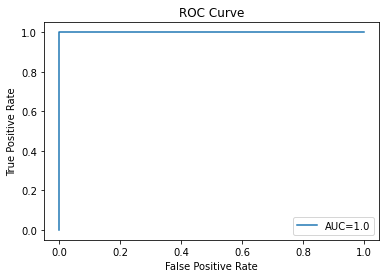

In [47]:
#roc
fpr, tpr, _ = roc_curve(y_train_sm, y_pred_probsm)
#plot ROC curve
plt.plot(fpr, tpr, label='AUC='+str(auc_score_sm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

(b) Binary Classification Using L1-penalized logistic regression

i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [49]:
# L1-penalized logistic regression
l=[]
C=[]
score=[]

for c,s in enumerate(series_list):
    y = s['classes']
    X = s.drop(columns='classes')

    process_b1 =  preprocessing.LabelEncoder()
    process_b1.fit(y)
    y = process_b1.transform(y)
    # fit scaler on X
    scale_b= MinMaxScaler().fit(X)
    X = scale_b.transform(X)
    #fit regression
    m1_b = LogisticRegressionCV(Cs=10, max_iter = 10000, penalty='l1', solver='liblinear', cv=StratifiedKFold(shuffle=True,  random_state=24))
    m1_b = m1_b.fit(X,y)
    m1_b_score = m1_b.scores_.get(1).mean(axis=0).max()
    
    l.append(c+1)
    C.append(m1_b.C_[0])
    score.append(m1_b_score)


In [50]:
#create a dataframe
df_bi = pd.DataFrame()
df_bi = df_bi.assign(L=l, Best_C=C, scores = score)
df_bi

,L,Best_C,scores
0,1,166.810054,1.000000
1,2,166.810054,0.957143
2,3,21.544347,0.942857
3,4,21.544347,0.942857
4,5,21.544347,0.927473
5,6,21.544347,0.941758
6,7,1291.549665,0.941758
7,8,166.810054,0.928571
8,9,1291.549665,0.956044
9,10,10000.000000,0.927473


ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [51]:
#RFECV
df2_bii = pd.DataFrame(df_feat_aiii.loc[df_feat_aiii['scores'].idxmax()]).T

df2_bii

,L,num_features,feature_name,scores
1,1,6,"[avg_RSS23_min_1, var_RSS12_max_1, avg_RSS23_m...",0.985531


In [52]:
# L1-penalized 
df2_bii2 = pd.DataFrame(df_bi.loc[df_bi['scores'].idxmax()]).T
df2_bii2

,L,Best_C,scores
0,1.0,166.810054,1.0


Ans: RFECV performs better because the score is higher. L1 penalized is easier to implement since we just pass 'penalty' parameter eqaul to L1 in the function.

(c) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [53]:
#train
def time_series(l):
    new_df2 = pd.DataFrame()
    split_train={}
    
    for l in range(l,l+1):
        for data in range(len(trainset)):
            classes = trainset[data]['activity']
            split_train = np.array_split(trainset[data],l)
            
            split_df = pd.DataFrame()
            for l1 in split_train:
                split_df = pd.concat([split_df.reset_index(drop=True),l1.reset_index(drop=True).\
                                      drop(columns=['time','classes','activity'])],axis=1)
            
            split_agg = np.array_split(split_df.agg(['min','max','mean']),3)
            split_agg[0].columns = split_agg[0].columns+'_min'
            split_agg[1].columns = split_agg[1].columns+'_max'
            split_agg[2].columns = split_agg[2].columns+'_mean'
            
            temp = pd.DataFrame()

            for l1 in split_agg:
                temp = pd.concat([temp.reset_index(drop=True),l1.reset_index(drop=True)],axis=1)
                

            temp['activity'] = classes
            new_df2 = pd.concat([new_df2, temp])
    
    l = []
    m = []

    for i in range(1, int((len(new_df2.columns)-1)/18)+1):
        l.append(list(new_df2.iloc[:,(i-1)*18:i*18].columns+'_'+str(i)))
        m += l[i-1]

    m = m+['activity']
    new_df2.columns = m
    
    return new_df2

In [54]:
#train split
dfc_1 = time_series(1)
dfc_2 = time_series(2)
dfc_3 = time_series(3)
dfc_4 = time_series(4)
dfc_5 = time_series(5)
dfc_6 = time_series(6)
dfc_7 = time_series(7)
dfc_8 = time_series(8)
dfc_9 = time_series(9)
dfc_10 = time_series(10)
dfc_11 = time_series(11)
dfc_12 = time_series(12)
dfc_13 = time_series(13)
dfc_14 = time_series(14)
dfc_15 = time_series(15)
dfc_16 = time_series(16)
dfc_17 = time_series(17)
dfc_18 = time_series(18)
dfc_19 = time_series(19)
dfc_20 = time_series(20)


series_list_c=[dfc_1, dfc_2, dfc_3, dfc_4, dfc_5, dfc_6, dfc_7, dfc_8, dfc_9, dfc_10, 
               dfc_11, dfc_12, dfc_13, dfc_14, dfc_15, dfc_16, dfc_17, dfc_18, dfc_19, dfc_20]

In [55]:
l2=[]
C2=[]
score2=[]

for c,s in enumerate(series_list_c):
    y = s['activity']
    X = s.drop(columns='activity')

    process_c1 =  preprocessing.LabelEncoder()
    process_c1.fit(y)
    y = process_c1.transform(y)
    # fit scaler on X
    scale_c= MinMaxScaler().fit(X)
    X = scale_c.transform(X)
    #fit regression
    m1_c = LogisticRegressionCV(Cs=10, max_iter = 10000, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=24),
                                scoring='accuracy',solver='saga',penalty='l1',multi_class='multinomial')
    m1_c = m1_c.fit(X,y)
    m1_c_score = m1_c.scores_.get(1).mean(axis=0).max()
    
    l2.append(c+1)
    C2.append(m1_c.C_[0])
    score2.append(m1_c_score)


In [56]:
y = dfc_1['activity']
X = dfc_1.drop(columns='activity')

process_c1 =  preprocessing.LabelEncoder()
y = process_c1.fit_transform(y)
# fit scaler on X
scale_c= MinMaxScaler().fit(X)
X = scale_c.transform(X)
#fit regression
m1_c = LogisticRegressionCV(Cs=10, max_iter = 10000, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=24),
                            scoring='accuracy',solver='saga',penalty='l1',multi_class='multinomial')
m1_c = m1_c.fit(X,y)
m1_c_score = m1_c.scores_.get(1).mean(axis=0).max()

l2.append(c+1)
C2.append(m1_c.C_[0])
score2.append(m1_c_score)

In [57]:
#create a dataframe of trainset
df_c = pd.DataFrame()
df_c = df_c.assign(L=l2, Best_C=C2, scores = score2)
df_c

,L,Best_C,scores
0,1,2.782559,0.853758
1,2,2.782559,0.825163
2,3,21.544347,0.795752
3,4,21.544347,0.812092
4,5,166.810054,0.796569
5,6,166.810054,0.811275
6,7,166.810054,0.782680
7,8,166.810054,0.826797
8,9,166.810054,0.811275
9,10,166.810054,0.797386


In [58]:
#best accuracy of trainset
df2_c = pd.DataFrame(df_c.loc[df_c['scores'].idxmax()]).T
df2_c

,L,Best_C,scores
0,1.0,2.782559,0.853758


In [59]:
#test
def time_series(l):
    new_df2_test = pd.DataFrame()
    split_test={}
    
    for l in range(l,l+1):
        for data in range(len(testset)):
            classes = testset[data]['activity']
            split_test = np.array_split(testset[data],l)
            
            split_df_test = pd.DataFrame()
            for l1 in split_test:
                split_df_test = pd.concat([split_df_test.reset_index(drop=True),l1.reset_index(drop=True).\
                                      drop(columns=['time','classes','activity'])],axis=1)
            
            split_agg_test = np.array_split(split_df_test.agg(['min','max','mean']),3)
            split_agg_test[0].columns = split_agg_test[0].columns+'_min'
            split_agg_test[1].columns = split_agg_test[1].columns+'_max'
            split_agg_test[2].columns = split_agg_test[2].columns+'_mean'
            
            temp = pd.DataFrame()

            for l1 in split_agg_test:
                temp = pd.concat([temp.reset_index(drop=True),l1.reset_index(drop=True)],axis=1)
                

            temp['activity'] = classes
            new_df2_test = pd.concat([new_df2_test, temp])
    
    l = []
    m = []

    for i in range(1, int((len(new_df2_test.columns)-1)/18)+1):
        l.append(list(new_df2_test.iloc[:,(i-1)*18:i*18].columns+'_'+str(i)))
        m += l[i-1]

    m = m+['activity']
    new_df2_test.columns = m
    
    return new_df2_test

In [60]:
dfcii_1 = time_series(1)
dfcii_2 = time_series(2)
dfcii_3 = time_series(3)
dfcii_4 = time_series(4)
dfcii_5 = time_series(5)
dfcii_6 = time_series(6)
dfcii_7 = time_series(7)
dfcii_8 = time_series(8)
dfcii_9 = time_series(9)
dfcii_10 = time_series(10)
dfcii_11 = time_series(11)
dfcii_12 = time_series(12)
dfcii_13 = time_series(13)
dfcii_14 = time_series(14)
dfcii_15 = time_series(15)
dfcii_16 = time_series(16)
dfcii_17 = time_series(17)
dfcii_18 = time_series(18)
dfcii_19 = time_series(19)
dfcii_20 = time_series(20)


series_list_test=[dfcii_1, dfcii_2, dfcii_3, dfcii_4, dfcii_5, dfcii_6, dfcii_7, dfcii_8, dfcii_9, dfcii_10, 
               dfcii_11, dfcii_12, dfcii_13, dfcii_14, dfcii_15, dfcii_16, dfcii_17, dfcii_18, dfcii_19, dfcii_20]

In [61]:
labels=[0,1,2,3,4,5,6]
y_pred = m1_c.predict(X)
#create confusion matrix
pd.DataFrame(confusion_matrix(y, y_pred, labels=labels))

,0,1,2,3,4,5,6
0,4,0,0,0,1,0,0
1,0,3,0,1,0,0,0
2,0,0,12,0,0,0,0
3,0,0,0,12,0,0,0
4,0,1,0,0,11,0,0
5,0,0,0,0,1,11,0
6,0,0,0,0,0,0,12


In [62]:
auc={}
fpr={}
tpr={}

for i in range(7):
    fpr[i],tpr[i],_ = roc_curve(np.array(pd.get_dummies(y))[:,i], m1_c.decision_function(X)[:,i])
    auc[i] = roc_auc_score(np.array(pd.get_dummies(y))[:,i], m1_c.decision_function(X)[:,i])

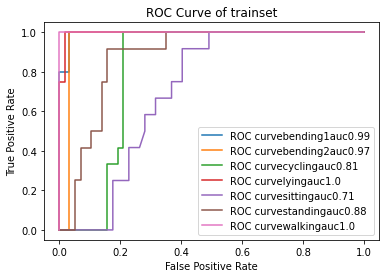

In [63]:
#roc of trainset
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+ classes + 'auc'+ str(round(auc[j],2))
    plt.plot(fpr[j], tpr[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of trainset')
plt.legend()
plt.show()

In [64]:
y = dfc_1['activity']
X = dfc_1.drop(columns='activity')
m1_c = LogisticRegressionCV(Cs=10, max_iter = 10000, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=24),
                                scoring='accuracy',solver='saga',penalty='l1',multi_class='multinomial')
m1_c = m1_c.fit(X,y)


In [65]:
y_test = dfcii_1['activity']
X_test = dfcii_1.drop(columns='activity')

process_c1 =  preprocessing.LabelEncoder()
process_c1.fit(y_test)
y_test = process_c1.transform(y_test)
# fit scaler on X
scale_c= MinMaxScaler().fit(X_test)
X_test = scale_c.transform(X_test)


In [66]:
auc={}
fpr={}
tpr={}

for i in range(7):
    fpr[i],tpr[i],_ = roc_curve(np.array(pd.get_dummies(y_test))[:,i], m1_c.decision_function(X_test)[:,i])
    auc[i] = roc_auc_score(np.array(pd.get_dummies(y_test))[:,i], m1_c.decision_function(X_test)[:,i])

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/Users/yuy

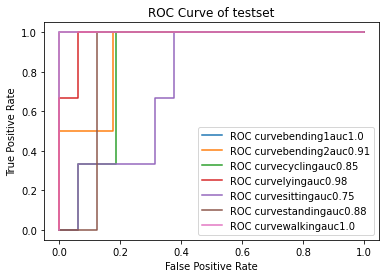

In [67]:
#roc of testset
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+ classes + 'auc'+ str(round(auc[j],2))
    plt.plot(fpr[j], tpr[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of testset')
plt.legend()
plt.show()

In [68]:
m1_c.predict(X_test)

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


array(['bending1', 'bending1', 'walking', 'walking', 'walking', 'walking',
       'cycling', 'lying', 'cycling', 'cycling', 'cycling', 'cycling',
       'cycling', 'cycling', 'lying', 'lying', 'cycling', 'cycling',
       'walking'], dtype=object)

In [69]:
y_test

array([0, 0, 6, 6, 6, 1, 1, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2])

In [70]:
logit = m1_c.score(X,y), m1_c.score(X_test, y_test)

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


In [71]:
logit

(1.0, 0.0)

ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [73]:
#Gaussian of train
l3=[]
C3=[]
gauss_score=[]

for c,s in enumerate(series_list_c):
    y = s['activity']
    X = s.drop(columns='activity')

    process_c2 =  preprocessing.LabelEncoder()
    process_c2.fit(y)
    y = process_c2.transform(y)
    # fit scaler on X
    scale_c2 = MinMaxScaler().fit(X)
    X = scale_c2.transform(X)
    #fit regression
    gauss=GaussianNB()
    gauss.fit(X,y)
    gauss_score3 = gauss.score(X,y)
    gauss_score.append(gauss_score3)
    l3.append(c+1)
    

In [74]:
#create a dataframe of trainset
df_c2 = pd.DataFrame()
df_c2 = df_c2.assign(L=l3, accuracy = gauss_score)
df_c2

,L,accuracy
0,1,0.971014
1,2,1.000000
2,3,0.971014
3,4,0.956522
4,5,0.927536
5,6,0.942029
6,7,0.942029
7,8,0.942029
8,9,0.985507
9,10,0.971014


In [75]:
#best accuracy of trainset
df2_c2 = pd.DataFrame(df_c2.loc[df_c2['accuracy'].idxmax()]).T
df2_c2

,L,accuracy
1,2.0,1.0


In [76]:
labels=[0,1,2,3,4,5,6]
y_pred_g = gauss.predict(X)
#create confusion matrix
pd.DataFrame(confusion_matrix(y, y_pred_g, labels=labels))

,0,1,2,3,4,5,6
0,5,0,0,0,0,0,0
1,0,4,0,0,0,0,0
2,0,0,12,0,0,0,0
3,0,0,0,12,0,0,0
4,0,0,0,0,11,1,0
5,0,0,0,0,0,12,0
6,0,0,0,0,0,0,12


In [77]:
auc2={}
fpr2={}
tpr2={}

for i in range(7):
    fpr2[i],tpr2[i],_ = roc_curve(np.array(pd.get_dummies(y))[:,i], gauss.predict_proba(X)[:,i])
    auc2[i] = roc_auc_score(np.array(pd.get_dummies(y))[:,i], gauss.predict_proba(X)[:,i])

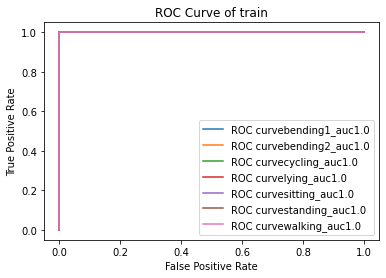

In [78]:
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+ classes +'_'+ 'auc'+ str(round(auc2[j],2))
    plt.plot(fpr2[j], tpr2[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of train')
plt.legend()
plt.show()

In [79]:
y = dfc_2['activity']
X = dfc_2.drop(columns='activity')

In [80]:
process_c2 =  preprocessing.LabelEncoder()
y = process_c2.fit_transform(y)

scale_c2 = MinMaxScaler().fit(X)
X = scale_c2.transform(X)

gauss=GaussianNB()
gauss.fit(X,y)

GaussianNB()

In [81]:
y_test = dfcii_2['activity']
X_test = dfcii_2.drop(columns='activity')

In [82]:
process_c2 =  preprocessing.LabelEncoder()
y_test = process_c2.fit_transform(y_test)

scale_c2 = MinMaxScaler().fit(X_test)
X_test = scale_c2.transform(X_test)


In [83]:
auc2i={}
fpr2i={}
tpr2i={}

for i in range(7):
    fpr2i[i],tpr2i[i],_ = roc_curve(np.array(pd.get_dummies(y_test))[:,i], gauss.predict_proba(X_test)[:,i])
    auc2i[i] = roc_auc_score(np.array(pd.get_dummies(y_test))[:,i], gauss.predict_proba(X_test)[:,i])

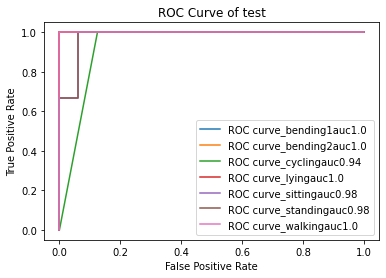

In [84]:
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+'_'+ classes + 'auc'+ str(round(auc2i[j],2))
    plt.plot(fpr2i[j], tpr2i[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test')
plt.legend()
plt.show()

In [85]:
gauss = gauss.score(X,y), gauss.score(X_test, y_test)
gauss

(1.0, 0.7894736842105263)

In [86]:
#Multinomial

l4=[]
C4=[]
multi_score=[]

for c,s in enumerate(series_list_c):
    y = s['activity']
    X = s.drop(columns='activity')

    process_c1 =  preprocessing.LabelEncoder()
    process_c1.fit(y)
    y = process_c1.transform(y)
    # fit scaler on X
    scale_c = MinMaxScaler().fit(X)
    X = scale_c.transform(X)
    #fit regression
    multinom = MultinomialNB()
    multinom.fit(X,y)
    multinom_score3 =  multinom.score(X,y)
    multi_score.append(multinom_score3)
    l4.append(c+1)
    

In [87]:
#create a dataframe of trainset
df_c3 = pd.DataFrame()
df_c3 = df_c3.assign(L=l4, accuracy = multi_score)
df_c3

,L,accuracy
0,1,0.782609
1,2,0.768116
2,3,0.753623
3,4,0.782609
4,5,0.840580
5,6,0.811594
6,7,0.840580
7,8,0.826087
8,9,0.826087
9,10,0.826087


In [88]:
#best accuracy of trainset
df2_c3 = pd.DataFrame(df_c3.loc[df_c3['accuracy'].idxmax()]).T
df2_c3

,L,accuracy
4,5.0,0.84058


In [89]:
y = dfc_5['activity']
X = dfc_5.drop(columns='activity')
process_c2 =  preprocessing.LabelEncoder()
y = process_c2.fit_transform(y)

scale_c2 = MinMaxScaler().fit(X)
X = scale_c2.transform(X)

#fit regression
multinom = MultinomialNB()
multinom.fit(X,y)

MultinomialNB()

In [90]:
labels=[0,1,2,3,4,5,6]
y_pred_m = multinom.predict(X)
#create confusion matrix
pd.DataFrame(confusion_matrix(y, y_pred_m, labels=labels))

,0,1,2,3,4,5,6
0,3,0,0,0,2,0,0
1,1,1,0,0,2,0,0
2,0,0,12,0,0,0,0
3,0,0,2,8,0,2,0
4,0,0,0,0,11,1,0
5,0,0,0,0,0,12,0
6,0,0,1,0,0,0,11


In [91]:
auc3={}
fpr3={}
tpr3={}

for i in range(7):
    fpr3[i],tpr3[i],_ = roc_curve(np.array(pd.get_dummies(y))[:,i], multinom.predict_proba(X)[:,i])
    auc3[i] = roc_auc_score(np.array(pd.get_dummies(y))[:,i], multinom.predict_proba(X)[:,i])

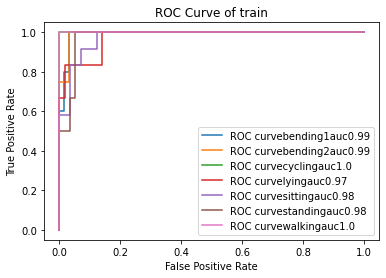

In [92]:
#roc curve of train
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+ classes + 'auc'+ str(round(auc3[j],2))
    plt.plot(fpr3[j], tpr3[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of train')
plt.legend()
plt.show()

In [93]:
#Multinomial of test

y_test = dfcii_5['activity']
X_test = dfcii_5.drop(columns='activity')

process_c2 =  preprocessing.LabelEncoder()
y_test = process_c2.fit_transform(y_test)

scale_c2 = MinMaxScaler().fit(X_test)
X_test = scale_c2.transform(X_test)

In [94]:
auc4={}
fpr4={}
tpr4={}

for i in range(7):
    fpr4[i],tpr4[i],_ = roc_curve(np.array(pd.get_dummies(y_test))[:,i], multinom.predict_proba(X_test)[:,i])
    auc4[i] = roc_auc_score(np.array(pd.get_dummies(y_test))[:,i], multinom.predict_proba(X_test)[:,i])

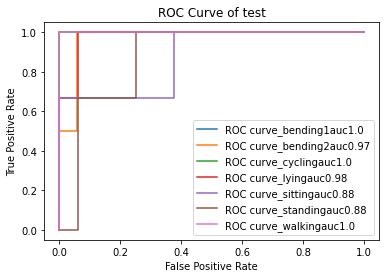

In [95]:
#roc curve of test
activity = ['bending1','bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
for j in range(7):
    classes = activity[j]
    labels = 'ROC curve'+ '_'+classes + 'auc'+ str(round(auc4[j],2))
    plt.plot(fpr4[j], tpr4[j], label  = labels)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test')
plt.legend()
plt.show()

In [96]:
multi= multinom.score(X,y), multinom.score(X_test, y_test)
multi

(0.8405797101449275, 0.6842105263157895)

iii. Which method is better for multi-class classification in this problem?

In [97]:
df_classes = pd.DataFrame().assign(LogitCV = logit, GaussianNB = gauss, Multinomial = multi)
df_classes.index=['training','test']
df_classes

,LogitCV,GaussianNB,Multinomial
training,1.0,1.000000,0.840580
test,0.0,0.789474,0.684211


Ans: Although the training score of GaussianNB is higher, test score of GaussianNB is lower, this means it might be overfit. Therefore, I think LogitCV is better.

3. ISLR, 4.8.3

This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.16). Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.
Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that σ12 = . . . = σK2 .


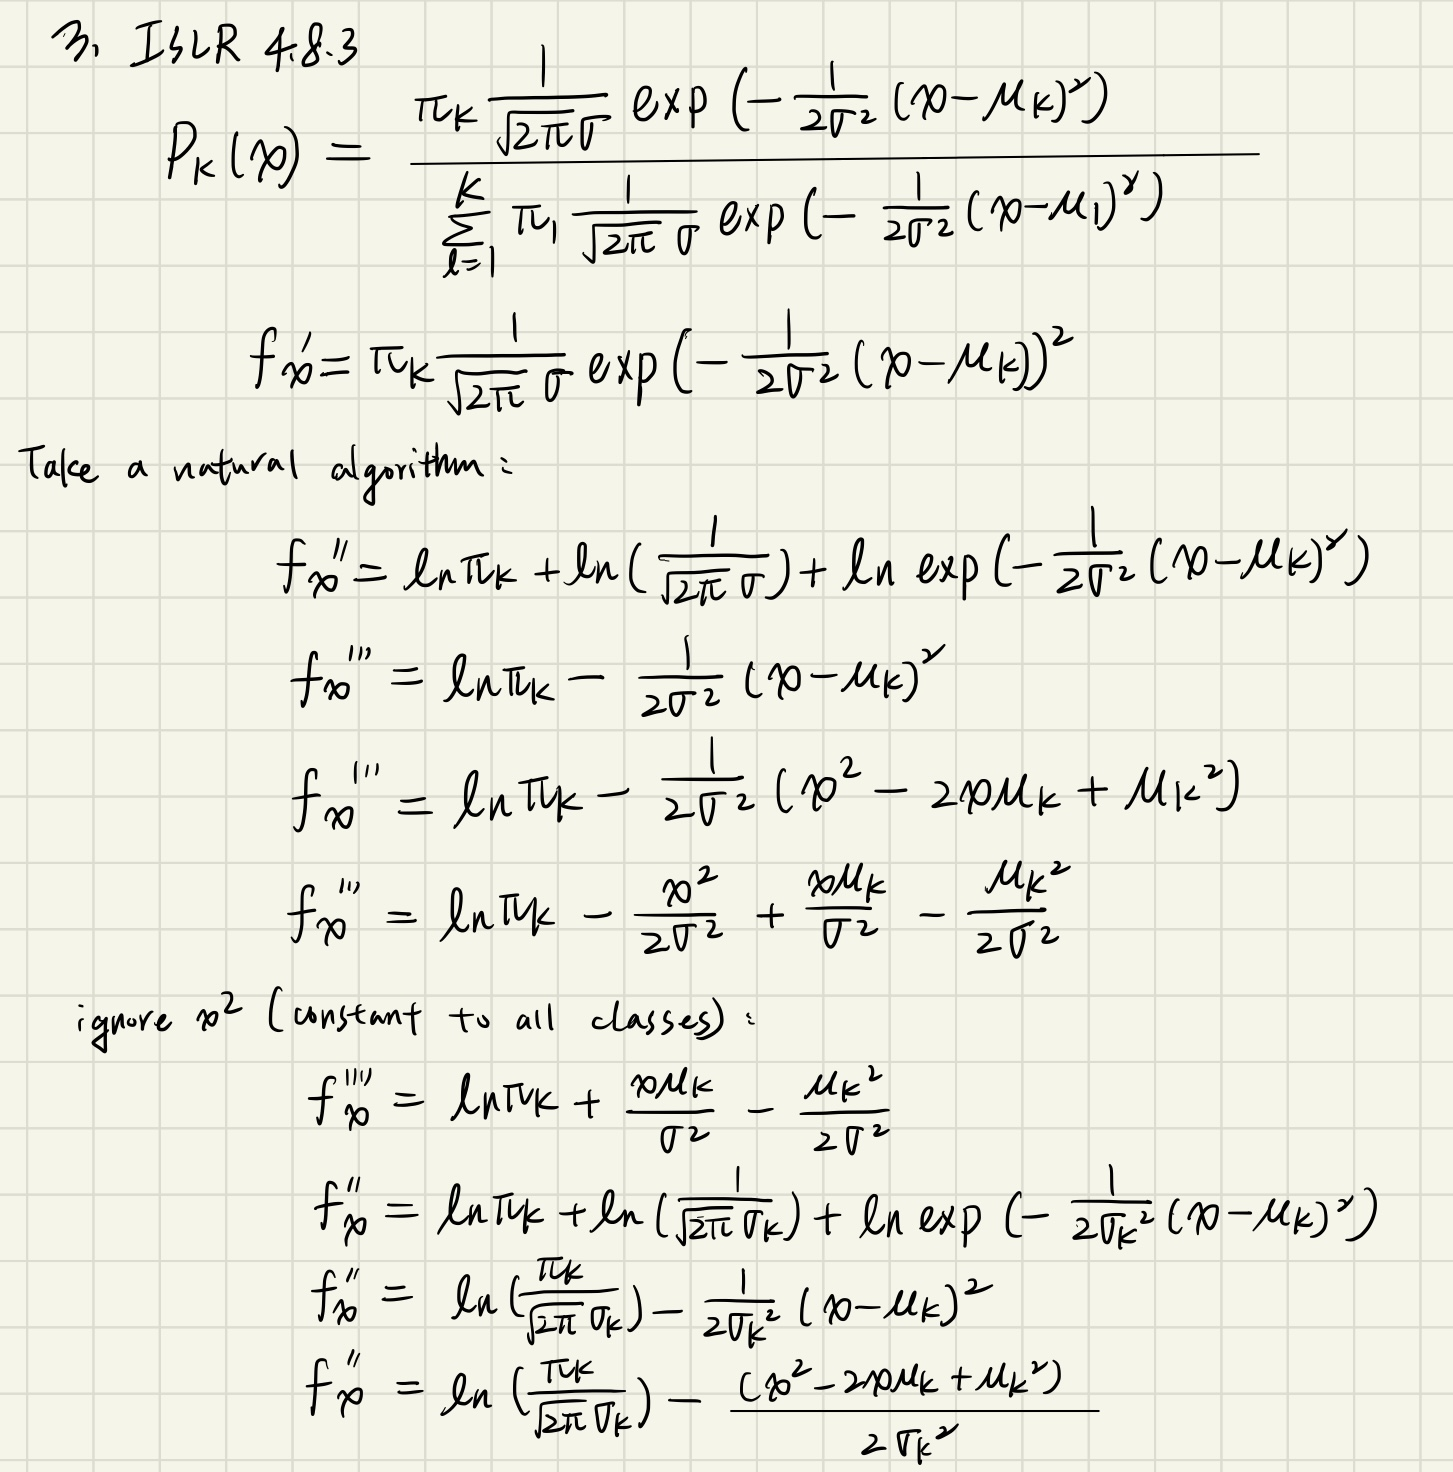

In [98]:
from IPython.display import Image
Image(filename='ISLR4.83.jpg',width=800, height=400)

4. ISLR 4.8.7

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.
Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

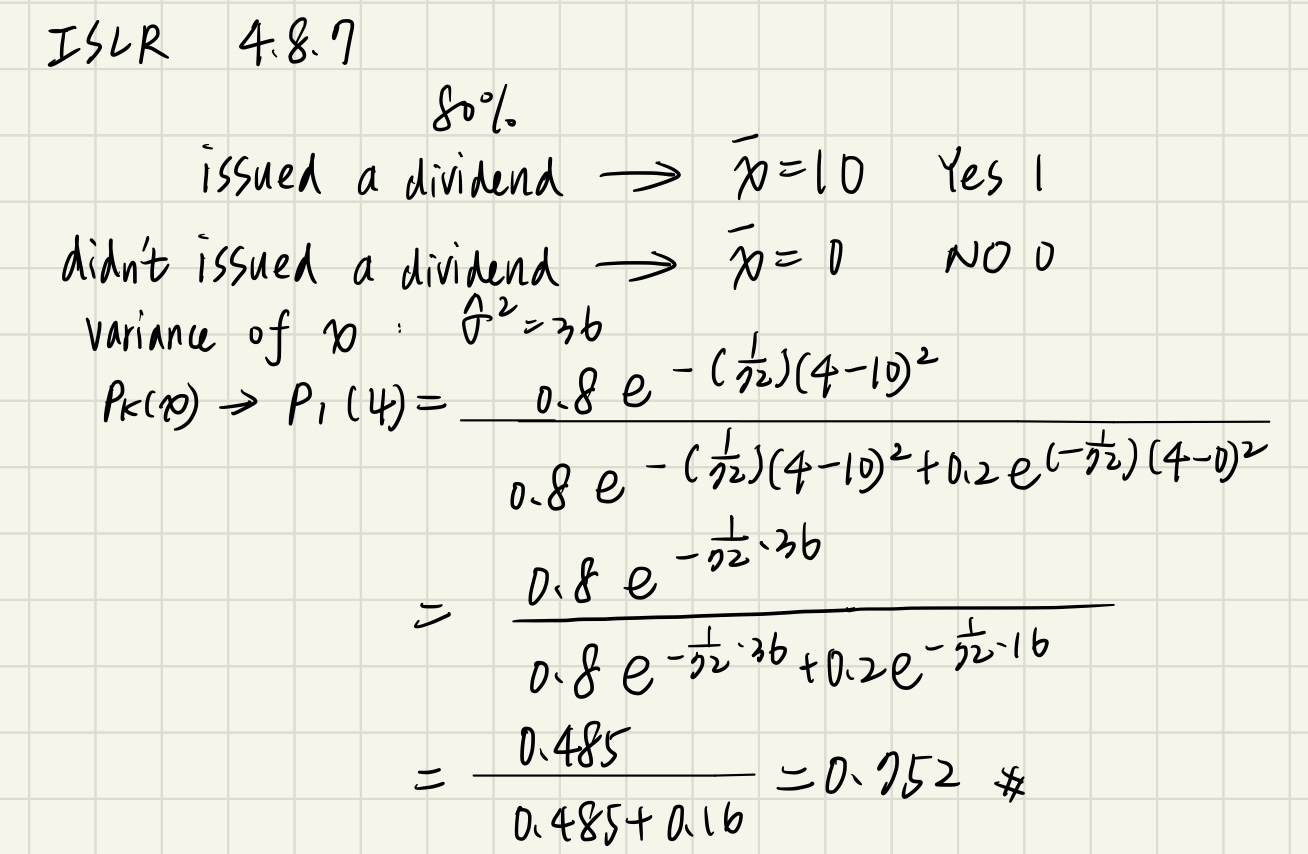

In [99]:
from IPython.display import Image
Image(filename='ISLR4.87.jpg',width=800, height=400)